In [1]:
import pandas as pd 
import numpy as np

In [2]:
gold_df = pd.read_csv('GOLDdata.csv')

In [3]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3060 non-null   object 
 1   Price   3060 non-null   float64
 2   Open    3060 non-null   float64
 3   High    3060 non-null   float64
 4   Low     3060 non-null   float64
dtypes: float64(4), object(1)
memory usage: 119.7+ KB


In [7]:
gold_df.tail(5)

,Date,Price,Open,High,Low
3055,1/9/2012,1608.1,1617.7,1624.6,1605.7
3056,1/6/2012,1616.8,1622.4,1632.3,1609.0
3057,1/5/2012,1620.1,1614.4,1626.8,1597.7
3058,1/4/2012,1612.7,1604.9,1619.8,1593.8
3059,1/3/2012,1600.5,1571.0,1608.7,1566.8


In [8]:
gold_df.set_index(pd.to_datetime(gold_df.Date), inplace= True)

In [9]:
gold_df.head(5)

,Date,Price,Open,High,Low
Date,,,,,
2023-10-27,10/27/2023,1998.5,1995.0,2019.7,1986.4
2023-10-26,10/26/2023,1997.4,1991.2,2003.7,1981.6
2023-10-25,10/25/2023,1994.9,1982.7,1998.6,1973.6
2023-10-24,10/24/2023,1986.1,1984.1,1992.0,1964.6
2023-10-23,10/23/2023,1987.8,1987.7,1994.3,1971.0


In [10]:
gold_df.drop('Date', axis= 1, inplace= True)
gold_df.head(5)

,Price,Open,High,Low
Date,,,,
2023-10-27,1998.5,1995.0,2019.7,1986.4
2023-10-26,1997.4,1991.2,2003.7,1981.6
2023-10-25,1994.9,1982.7,1998.6,1973.6
2023-10-24,1986.1,1984.1,1992.0,1964.6
2023-10-23,1987.8,1987.7,1994.3,1971.0


In [13]:
gold_df = gold_df.sort_index(ascending= True)
gold_df.head(5)

,Price,Open,High,Low
Date,,,,
2012-01-03,1600.5,1571.0,1608.7,1566.8
2012-01-04,1612.7,1604.9,1619.8,1593.8
2012-01-05,1620.1,1614.4,1626.8,1597.7
2012-01-06,1616.8,1622.4,1632.3,1609.0
2012-01-09,1608.1,1617.7,1624.6,1605.7


In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

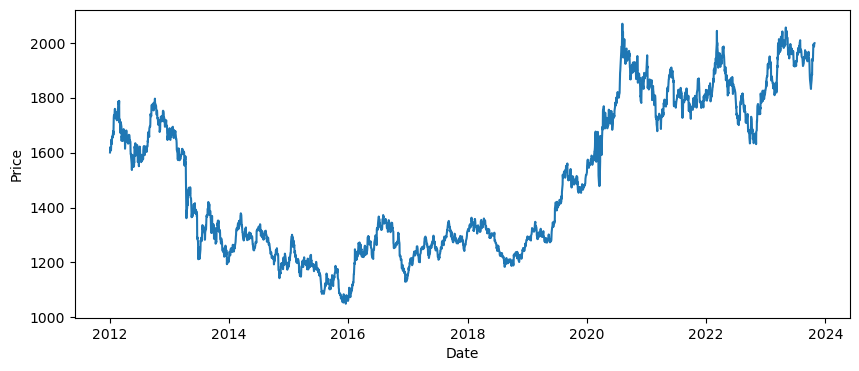

In [15]:
plt.figure(figsize= (10,4))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(gold_df['Price']);

Using Moving Average for forecast below

In [16]:
gold_df['mavg_365'] = gold_df['Price'].rolling(window= 365).mean().shift(1)

In [18]:
gold_df[['Price', 'mavg_365']][365:]

,Price,mavg_365
Date,,
2013-06-03,1411.9,1636.647397
2013-06-04,1397.2,1636.130685
2013-06-05,1398.5,1635.540274
2013-06-06,1415.8,1634.933151
2013-06-07,1383.0,1634.382466
...,...,...
2023-10-23,1987.8,1860.356986
2023-10-24,1986.1,1860.751781
2023-10-25,1994.9,1861.118904


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


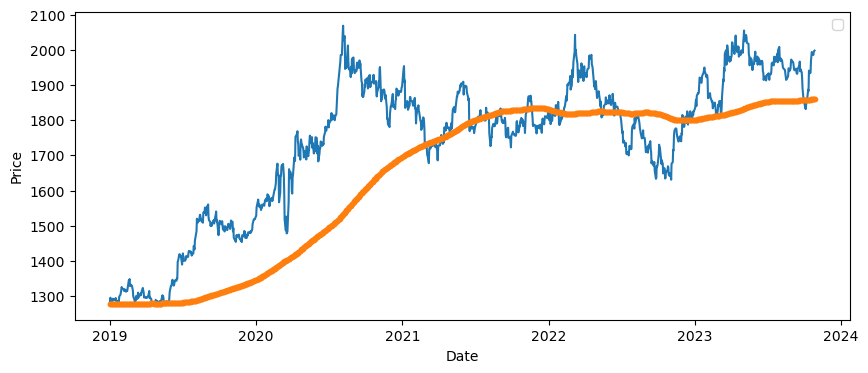

In [23]:
plt.figure(figsize= (10,4))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(gold_df['Price']['1/1/2019':]);
plt.plot(gold_df['mavg_365']['1/1/2019':], '.');
plt.legend();

In [24]:
def get_mape(actual, predicted):
    y_true, y_predicted = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted)/actual))*100,2)

In [25]:
get_mape(gold_df['Price']['1/1/2019':].values, gold_df['mavg_365']['1/1/2019':].values)#shows forecasting using
#moving average shows MAPE of 6.89%

6.89

In [26]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(gold_df['Price']['1/1/2019':].values, gold_df['mavg_365']['1/1/2019':].values))
#rmse of the moving average model indicates that the prediction by the model has a standard deviation of 157.90

157.9054988278922

Performing exponential smoothing below

In [27]:
gold_df['ewm'] = gold_df['Price'].ewm(alpha= 0.2).mean()

In [29]:
get_mape(gold_df['Price']['1/1/2019':].values, gold_df['ewm']['1/1/2019':].values)#the mape is further reduced
#which is a good sign

0.93

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


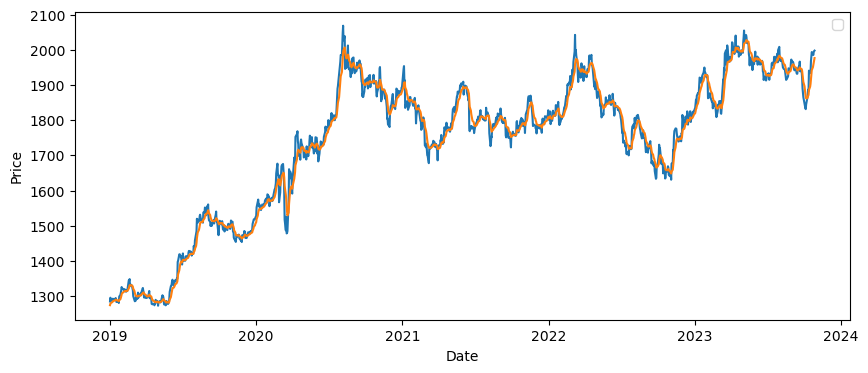

In [30]:
plt.figure(figsize= (10,4))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(gold_df['Price']['1/1/2019':]);
plt.plot(gold_df['ewm']['1/1/2019':]);
plt.legend();

Performing Time Series Analysis

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
ts_decompose = seasonal_decompose(np.array(gold_df['Price']), model= 'multiplicative', period= 365)

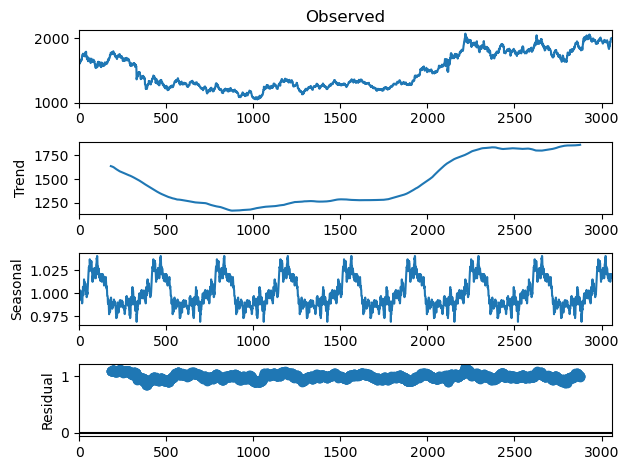

In [34]:
ts_plot = ts_decompose.plot()#the plot shows that the seasonality index varies between 0.975 and 1.027

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

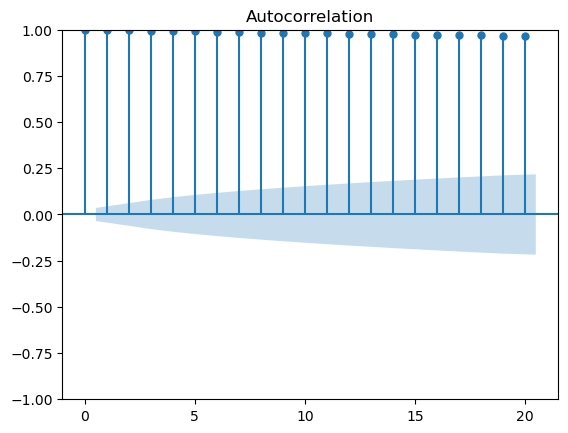

In [36]:
acf_plot = plot_acf(gold_df.Price, lags= 20)

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


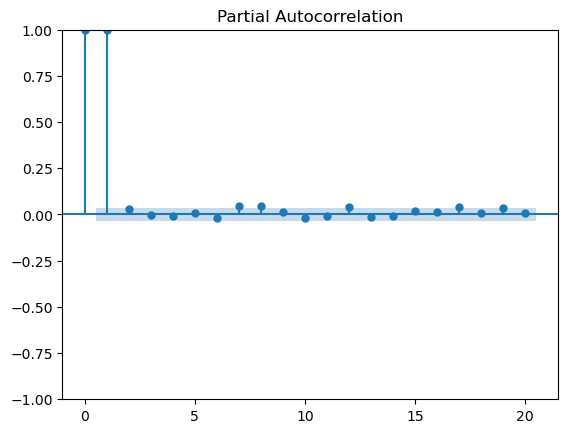

In [37]:
pacf_plot = plot_pacf(gold_df.Price, lags= 20)

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
arima = ARIMA(gold_df.Price[0:2449].astype(np.float64).values, order = (1,0,0))

In [42]:
ar_model = arima.fit()

In [44]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2449
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -10031.308
Date:                Sun, 29 Oct 2023   AIC                          20068.616
Time:                        17:39:35   BIC                          20086.026
Sample:                             0   HQIC                         20074.944
                               - 2449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1406.6181    167.149      8.415      0.000    1079.012    1734.224
ar.L1          0.9984      0.001    899.662      0.000       0.996       1.001
sigma2       210.9975      2.647     79.715      0.000     205.810     216.185
===================================================================================
Ljung-Box (L1) (Q):                   3.32   Jarque-Bera (JB):              9079.07
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.71
Prob(H) (two-sided):                  0.24   Kurtosis:                        12.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
forecast = ar_model.predict(2449, 3060)

In [47]:
get_mape(gold_df.Price[2448:], forecast)#the mape % is 11.56 while using ARIMA for AR model

11.56

In [48]:
arima = ARIMA(gold_df.Price[0:2449].astype(np.float64).values, order= (1,0,1))

In [49]:
ar_model = arima.fit()

In [50]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2449
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -10029.677
Date:                Sun, 29 Oct 2023   AIC                          20067.354
Time:                        17:56:45   BIC                          20090.568
Sample:                             0   HQIC                         20075.791
                               - 2449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1406.6180    171.475      8.203      0.000    1070.533    1742.703
ar.L1          0.9985      0.001    921.351      0.000       0.996       1.001
ma.L1         -0.0361      0.014     -2.547      0.011      -0.064      -0.008
sigma2       210.7338      2.878     73.228      0.000     205.093     216.374
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9730.40
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.72
Prob(H) (two-sided):                  0.21   Kurtosis:                        12.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
forecast = ar_model.predict(2449, 3060)

In [52]:
get_mape(gold_df.Price[2448:], forecast) #the mape improved by 0.39% from AR model 

11.17

In [53]:
from statsmodels.tsa.stattools import adfuller

In [54]:
def adfuller_test(ts):
    adfuller_result = adfuller(ts, autolag= None)
    adfuller_out = pd.Series(adfuller_result[0:4],
                            index= ['Test Statistic', 'p-value',
                                   'Lags Used', 'Number of Observations Used'])
    print(adfuller_out)

In [55]:
adfuller_test(gold_df.Price)#shows that the p-value is greater than 0.05 and hence we cannot reject the null
#hypothesis that series is not stationary

Test Statistic                   -0.749823
p-value                           0.833419
Lags Used                        29.000000
Number of Observations Used    3030.000000
dtype: float64


In [56]:
gold_df['pric_diff'] = gold_df.Price - gold_df.Price.shift(1)
gold_df.head(5)

,Price,Open,High,Low,mavg_365,ewm,pric_diff
Date,,,,,,,
2012-01-03,1600.5,1571.0,1608.7,1566.8,NaN,1600.500000,NaN
2012-01-04,1612.7,1604.9,1619.8,1593.8,NaN,1607.277778,12.2
2012-01-05,1620.1,1614.4,1626.8,1597.7,NaN,1612.532787,7.4
2012-01-06,1616.8,1622.4,1632.3,1609.0,NaN,1613.978320,-3.3
2012-01-09,1608.1,1617.7,1624.6,1605.7,NaN,1612.229653,-8.7


In [57]:
gold_df_diff = gold_df.dropna()
gold_df_diff.head(5)

,Price,Open,High,Low,mavg_365,ewm,pric_diff
Date,,,,,,,
2013-06-03,1411.9,1388.8,1416.5,1388.3,1636.647397,1396.964233,18.9
2013-06-04,1397.2,1411.2,1414.8,1388.1,1636.130685,1397.011386,-14.7
2013-06-05,1398.5,1398.8,1410.3,1395.1,1635.540274,1397.309109,1.3
2013-06-06,1415.8,1401.8,1423.3,1391.2,1634.933151,1401.007287,17.3
2013-06-07,1383.0,1412.7,1417.7,1377.1,1634.382466,1397.405830,-32.8


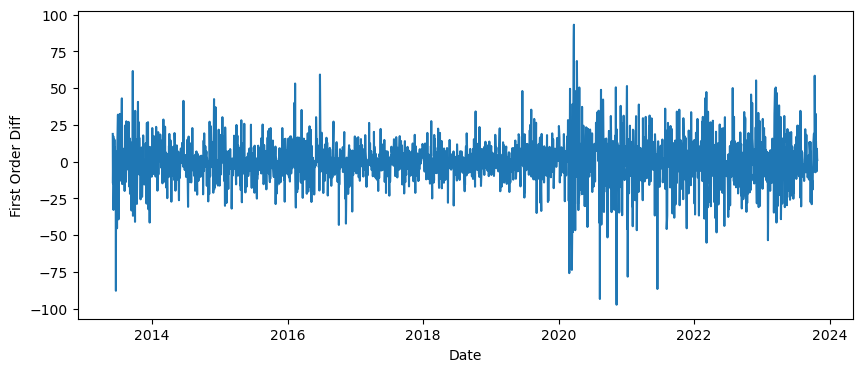

In [58]:
plt.figure(figsize= (10,4))
plt.xlabel('Date')
plt.ylabel('First Order Diff')
plt.plot(gold_df_diff.pric_diff)

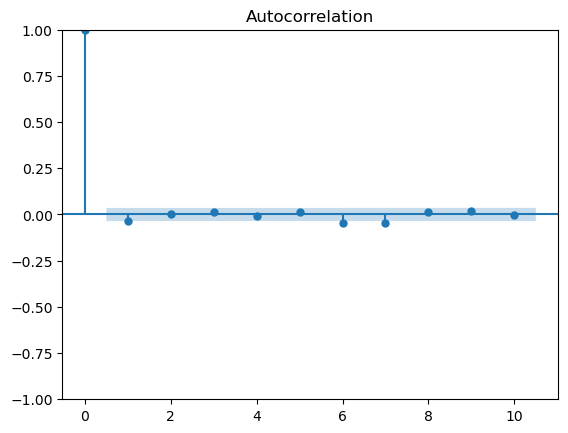

In [59]:
acf_plot = plot_acf(gold_df.pric_diff.dropna(), lags= 10)#The ACF plot shows no sign of slow 
#reduction in autocorrelation over lags.

In [65]:
gold_train = gold_df[0:2449]
gold_test = gold_df[2449:]

In [66]:
arima = ARIMA(gold_train.Price.astype(np.float64).values, order= (1,1,1))

In [67]:
ar_model = arima.fit()

In [68]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2449
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10023.449
Date:                Sun, 29 Oct 2023   AIC                          20052.899
Time:                        18:35:09   BIC                          20070.308
Sample:                             0   HQIC                         20059.226
                               - 2449                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2405      0.354     -0.679      0.497      -0.935       0.454
ma.L1          0.2017      0.358      0.564      0.573      -0.500       0.903
sigma2       210.8683      2.705     77.945      0.000     205.566     216.171
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10009.19
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.76
Prob(H) (two-sided):                  0.22   Kurtosis:                        12.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

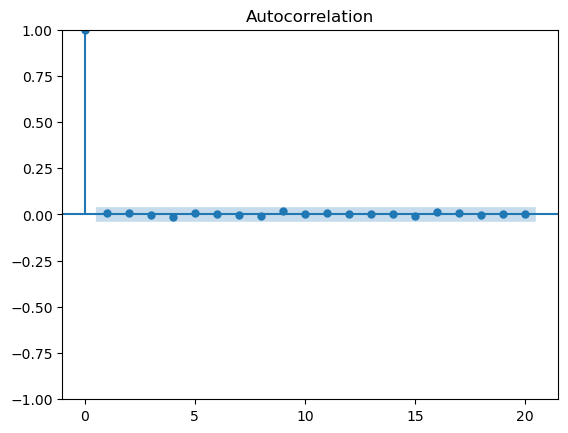

In [69]:
acf_plot = plot_acf(ar_model.resid, lags= 20)

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


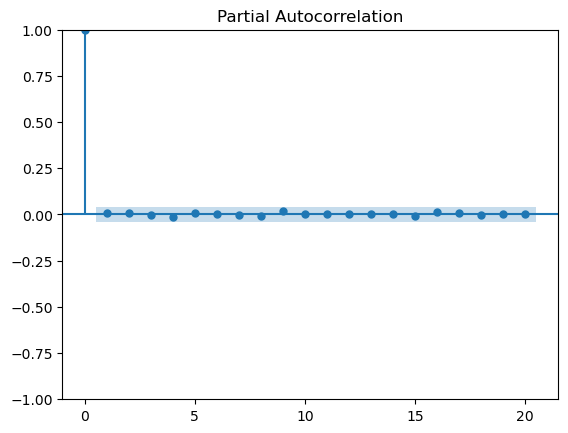

In [70]:
pacf_plot = plot_pacf(ar_model.resid, lags= 20)

In [76]:
gold_predict = ar_model.forecast(steps = 7)

In [78]:
gold_predict

array([1764.28043287, 1764.11681738, 1764.15616002, 1764.14669977,
       1764.14897456, 1764.14842757, 1764.1485591 ])

In [79]:
get_mape(gold_test, gold_predict)

/Users/ishutejwani/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Price        5.49
Open         5.51
High         5.88
Low          5.15
mavg_365     3.39
ewm          5.34
pric_diff     inf
dtype: float64